,CPU model,Platform,count
0,4300U,Linux,28
1,4300U,Windows,114
2,4450U,Windows,11
3,4500U,Linux,241
4,4500U,Windows,1552
5,4600H,Linux,16
6,4600H,Windows,739
7,4600HS,Linux,7
8,4600HS,Windows,85
9,4600U,Linux,43


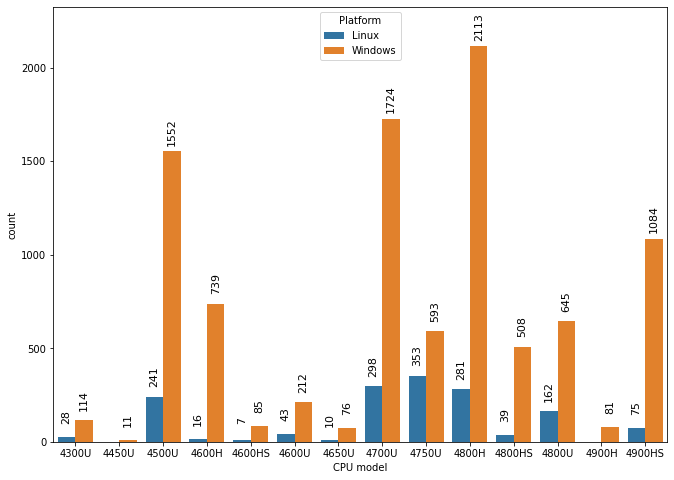

In [34]:
import os
import pandas as pd
import re
import seaborn as sns
from matplotlib import pyplot


df = pd.read_excel('./result.xlsx')

# Filter Ryzens
df = df[df['CPU model'].str.contains('Ryzen')]

# Filter Linux/Windows
df = df[df['Platform'].isin(['Linux', 'Windows'])]

df['CPU model long'] = df['CPU model']
df['CPU model'] = df['CPU model'].apply(lambda x: re.search(r'4\d{3}\w+', x).group())

def plot(plot_func, *args, **kwargs):
    fig, ax = pyplot.subplots(figsize=(11, 8))
    kwargs['ax'] = ax

    ax = plot_func(*args, **kwargs)
    for p in ax.patches:
        ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', rotation=90, fontsize=11, xytext=(0, 20),
            textcoords='offset points')

    ax.set_ylim(0, kwargs['data'][kwargs['y']].max() * 1.1)


counts = df.groupby(['CPU model', 'Platform'])['CPU model'].count().reset_index(name='count')
plot(sns.barplot, x='CPU model', y='count', hue='Platform', data=counts)
counts.head(10)

In [35]:
def _get_cpu_as_int(cpu):
    _, base, suffix = re.split(r"(\d+)", cpu.lower())
    return int(base) + {"u": 0, "h": 1, "hs": 2}[suffix]

df['CPU as int'] = df['CPU model'].apply(_get_cpu_as_int)

def mean_groupby(
    df, 
    group_columns=['Model', 'CPU model', 'Platform'], 
):
    return df.groupby(group_columns).mean().sort_values('CPU as int').reset_index()


df_mean = mean_groupby(df)
df_mean.tail()

,Model,CPU model,Platform,Single-Core Score,Multi-Core Score,CPU as int
714,ASUSTeK COMPUTER INC. ROG Zephyrus G14 GA401IV_A,4900HS,Windows,1208.500000,7434.500000,4902.0
715,ASUSTeK COMPUTER INC. ROG Zephyrus G15 GA502IV...,4900HS,Windows,1179.941176,7597.882353,4902.0
716,ASUSTeK COMPUTER INC. ROG Zephyrus G15 GA502IV...,4900HS,Linux,1170.000000,7012.923077,4902.0
717,Zephyrus G14,4900HS,Windows,1198.000000,7769.000000,4902.0
718,阿苏特克电脑公司罗格泽菲鲁斯 G15 GA502IV_GA502IV,4900HS,Windows,1232.000000,7836.000000,4902.0


,CPU model,Platform,Single-Core Score,Multi-Core Score,CPU as int
0,4300U,Linux,693.571429,1399.642857,4300.0
1,4300U,Windows,694.500000,1671.535088,4300.0
2,4450U,Windows,927.000000,3499.181818,4450.0
3,4500U,Linux,825.908714,2894.663900,4500.0
4,4500U,Windows,902.735180,3677.987113,4500.0
5,4600U,Linux,632.767442,1156.069767,4600.0
6,4600U,Windows,787.004717,3011.066038,4600.0
7,4600H,Linux,847.750000,3497.687500,4601.0
8,4600H,Windows,1000.832206,5112.543978,4601.0
9,4600HS,Linux,1000.285714,4559.285714,4602.0


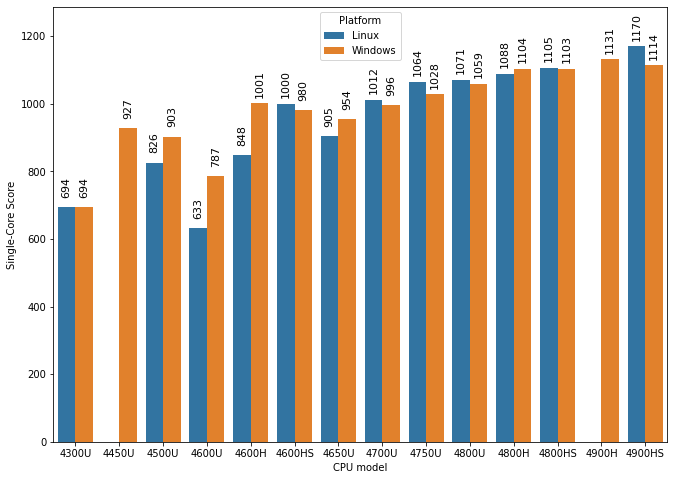

In [36]:
df_mean_cpu = mean_groupby(df, group_columns=['CPU model', 'Platform'])

plot(sns.barplot, x="CPU model", y="Single-Core Score", hue='Platform', data=df_mean_cpu)
df_mean_cpu.head(30)

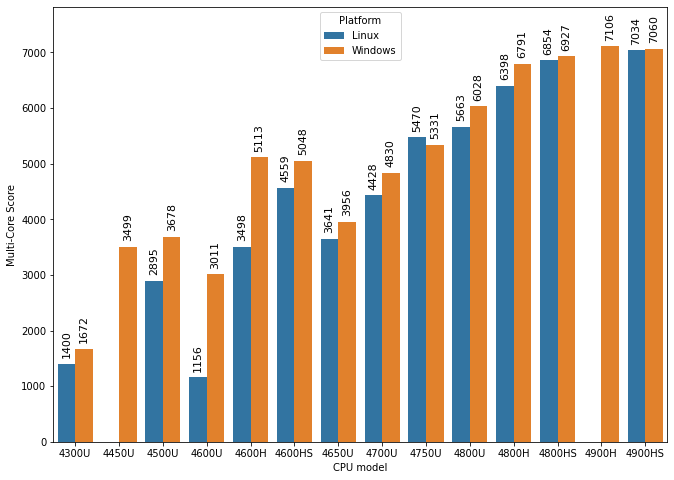

In [37]:
plot(sns.barplot, x="CPU model", y="Multi-Core Score", hue='Platform', data=df_mean_cpu)

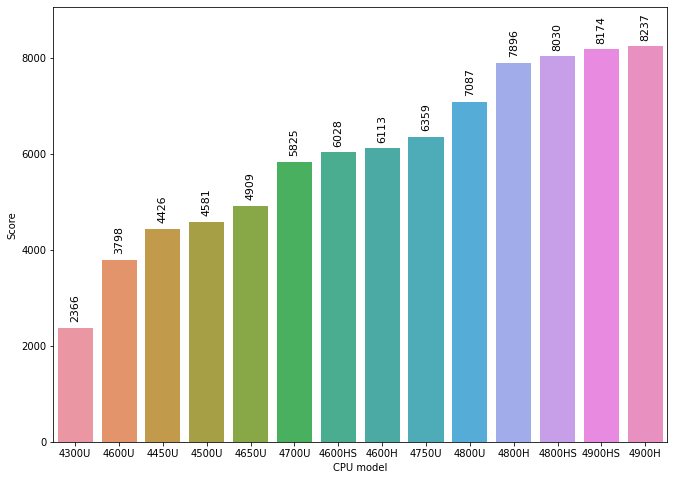

In [38]:
df_win = df[df['Platform'] == 'Windows']
df_win['Score'] = df_win['Multi-Core Score'] + df_win['Single-Core Score']

df_mean_cpu = mean_groupby(df_win, group_columns=['CPU model', 'Platform']).sort_values('Score')

plot(sns.barplot, x="CPU model", y="Score", data=df_mean_cpu.reset_index())